In [688]:
import pyforest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [689]:
train_data  = pd.read_csv('titanic_prediction_train.csv', encoding='latin-1')
test_data = pd.read_csv('titanic_prediction_test.csv', encoding='latin-1')
test_data2 = pd.read_csv('gender_submission.csv', encoding='latin-1')

In [690]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [691]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [692]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [693]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [694]:
train_data.shape

(891, 12)

C:\Users\mtcko\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mtcko\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<function matplotlib.pyplot.show(*args, **kw)>

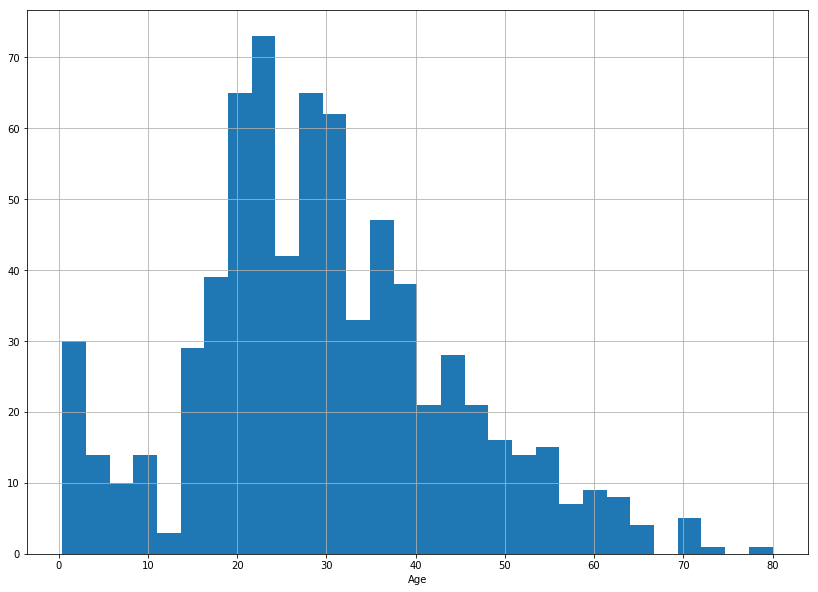

In [695]:
plt.figure(figsize=(14,10))
plt.hist('Age', data=train_data, bins=30)
plt.xlabel('Age')
plt.grid(True)
plt.show

In [696]:
#-- CATEGORIZE SEX
train_data['Sex'] = train_data['Sex'].astype('category')
train_data['Sex'] = train_data['Sex'].cat.codes

#-- CATEGORIZE CABIN
train_data['Cabin'] = train_data['Cabin'].astype('category')
train_data['Cabin'] = train_data['Cabin'].cat.codes

#-- CATEGORIZE EMBARKED
train_data['Embarked'] = train_data['Embarked'].astype('category')
train_data['Embarked'] = train_data['Embarked'].cat.codes

In [697]:
# average_age = data['Age'].mean()
# data.loc[data['Age'] == isnull(),'Age'] = average_age

train_data = train_data.dropna(subset=['Age'])

In [698]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,-1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,-1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,-1,2


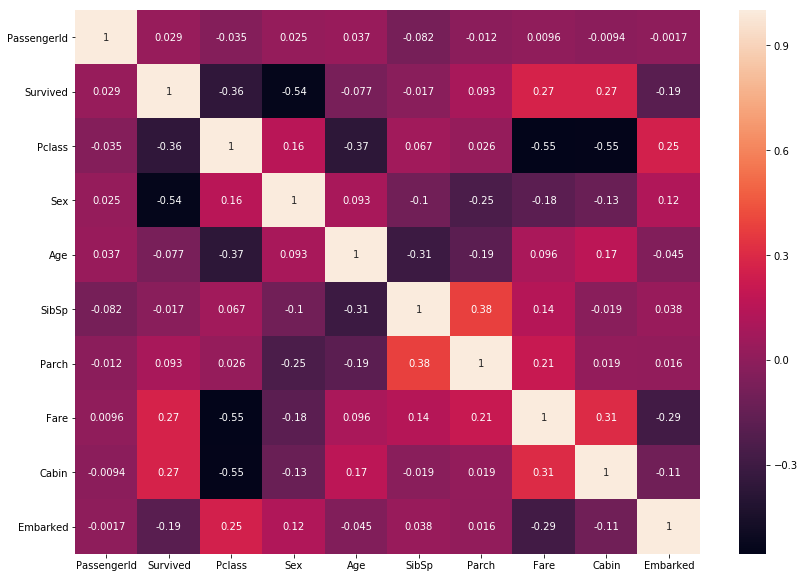

In [699]:
plt.figure(figsize=(14,10))
sns.heatmap(train_data.corr(), annot=True)

In [700]:
#sns.pairplot(data)

In [701]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,-1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,-1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,-1,2


In [702]:
#-- ANALYZE TEST DATA
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [703]:
test_data['Sex'] = test_data['Sex'].astype('category')
test_data['Sex'] = test_data['Sex'].cat.codes

#-- CATEGORIZE CABIN
test_data['Cabin'] = test_data['Cabin'].astype('category')
test_data['Cabin'] = test_data['Cabin'].cat.codes

#-- CATEGORIZE EMBARKED
test_data['Embarked'] = test_data['Embarked'].astype('category')
test_data['Embarked'] = test_data['Embarked'].cat.codes

In [704]:
# test_data = test_data.dropna(subset=['Age'])
# test_data = test_data.dropna(subset=['Fare'])

In [705]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,-1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,-1,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,-1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,-1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,-1,2


In [706]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [669]:
#-------------------------------------------------------------------------------------------------#

In [707]:
#-- ANALYZE TEST DATA
test_data2.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [708]:
test_data2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [709]:
test_data2.shape

(418, 2)

In [710]:
test_data.shape

(418, 11)

In [735]:
test_features = test_data[['Pclass', 'SibSp','Parch','Sex','Embarked']]
test_label = test_data2['Survived']

In [736]:
#features = train_data[['Pclass', 'SibSp','Parch', 'Fare','Sex','Cabin','Embarked','Age']]
#label = train_data['Survived']

In [737]:
# model = LogisticRegression()

In [738]:
# features_train, features_test, label_train, label_test = train_test_split(test_features,test_label,test_size=0.1)

In [744]:
# model.fit(features_train,label_train)

In [742]:
print(classification_report(test_label, model.predict(test_features)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

   micro avg       1.00      1.00      1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [743]:
print(classification_report(test_label, model.predict(test_features)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       152

   micro avg       1.00      1.00      1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418

